In [11]:
from cdshealpix.nested import lonlat_to_healpix
import cdshealpix
print(cdshealpix.__version__)
import astropy.units as u
import numpy as np

0.4.2


In [25]:
num_pixels = 1024
lon = np.linspace(0, 360, num_pixels)
lat = np.linspace(-90, 90, num_pixels)
lon, lat = np.meshgrid(lon, lat)

In [31]:
depth = 2
num_tile = 12 * (4 ** depth)
idx, dx, dy = lonlat_to_healpix(lon * u.deg, lat * u.deg, depth, return_offsets=True)

In [32]:
dx[dx < 0.0] = 0.0
dy[dy < 0.0] = 0.0

dx = dx.astype(np.float32)
dy = dy.astype(np.float32)
idx = idx.astype(np.float32)

In [33]:
shape = idx.shape
idx=idx.ravel()
dx=dx.ravel()
dy=dy.ravel()

In [34]:
img = np.vstack(((idx.astype(np.float32) * 255.0 / float(num_tile - 1)).astype(np.uint8), (dx * 255).astype(np.uint8), (dy * 255).astype(np.uint8))).T
print(img.shape)
img = img.reshape((shape[0], shape[1], 3))
img = img.astype(np.uint8)
img

(1048576, 3)


array([[[170,   0,   0],
        [170,   0,   0],
        [170,   0,   0],
        ...,
        [234,   0,   0],
        [234,   0,   0],
        [170,   0,   0]],

       [[170,   0,   3],
        [170,   0,   3],
        [170,   0,   3],
        ...,
        [234,   3,   0],
        [234,   3,   0],
        [170,   0,   3]],

       [[170,   0,   7],
        [170,   0,   7],
        [170,   0,   7],
        ...,
        [234,   7,   0],
        [234,   7,   0],
        [170,   0,   7]],

       ...,

       [[ 20, 247,   0],
        [ 20, 247, 254],
        [ 20, 247, 254],
        ...,
        [ 84, 254, 247],
        [ 84, 254, 247],
        [ 20, 247,   0]],

       [[ 20, 251,   0],
        [ 20, 251, 254],
        [ 20, 251, 254],
        ...,
        [ 84, 254, 251],
        [ 84, 254, 251],
        [ 20, 251,   0]],

       [[ 20,   0,   0],
        [ 20,   0,   0],
        [ 20,   0,   0],
        ...,
        [ 84,   0,   0],
        [ 84,   0,   0],
        [ 20,   0,   0]]

(1024, 1024, 3)


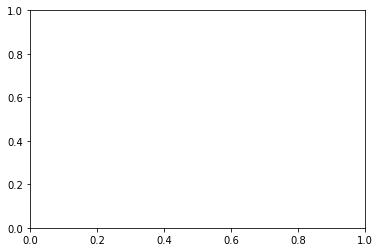

In [37]:
print(img.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.imsave('ang2pix_depth' + str(depth) + '.raw', arr=img, vmax=255, vmin=0)

In [38]:
print(depth)

2
